In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fiona shapely pyproj rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 5.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

In [6]:
import os
os.chdir("/Users/preethireddy/Downloads/untitled folder")
print(os.getcwd())

/Users/preethireddy/Downloads/untitled folder


In [7]:
data = pd.read_csv("NSSO68.csv")

/var/folders/6z/2_1kbd2d7bn0rz1lm8mdnvmr0000gn/T/ipykernel_73525/4031375496.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [8]:
df = data[data['state_1'] == 'KA']

In [9]:
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
23109  23110  46099999999999994133134266335232.0             1       46141   
23110  23111  46099999999999994133134266335232.0             1       46141   
23111  23112  46099999999999994133134266335232.0             1       46141   
23112  23113  46099999999999994133134266335232.0             1       46141   
23113  23114  46099999999999994133134266335232.0             1       46141   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
23109     68               10       1       2     29           294  ...   
23110     68    

In [10]:
missing_info = df.isnull().sum()
print("Missing Values Information:")
print(missing_info)

Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [11]:
kanew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]


In [13]:
kanew['Meals_At_Home'].fillna(kanew['Meals_At_Home'].mean(), inplace=True)

/var/folders/6z/2_1kbd2d7bn0rz1lm8mdnvmr0000gn/T/ipykernel_73525/2302882926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kanew['Meals_At_Home'].fillna(kanew['Meals_At_Home'].mean(), inplace=True)


In [14]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    kanew = remove_outliers(kanew, col)

In [15]:
kanew['total_consumption'] = kanew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

In [16]:
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
    return summary

In [17]:
district_summary = summarize_consumption(kanew, 'District')
region_summary = summarize_consumption(kanew, 'Region')

print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
    District  total_consumption
19        20        2281.357870
0          1        2174.372053
25        26        1479.373753
17        18        1441.823070
Region Consumption Summary:
   Region  total_consumption
3       4       12927.830332
2       3        9809.685463
1       2        3508.461239
0       1        2550.411172


In [18]:
district_mapping = {"1": "Belgaum", "2": "Bagalkot", "3": "Bijapur", "4": "Gulbarga", 
                    "5": "Bidar", "6": "Raichur", "7": "Koppal", "8": "Gadag", 
                    "9": "Dharwad", "10": "Uttara Kannada", "11": "Haveri", 
                    "12": "Bellary", "13": "Chitradurga", "14": "Davanagere", 
                    "15": "Shimoga", "16": "Udupi", "17": "Chikmagalur", 
                    "18": "Tumkur", "19": "Kolar", "20": "Bangalore", 
                    "21": "Bangalore Rural", "22": "Mandya", "23": "Hassan", 
                    "24": "Dakshina Kannada", "25": "Kodagu", "26": "Mysore", 
                    "27": "Chamarajanagar", "28": "Ramanagar", "29": "Chikkaballapura"}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

kanew["District"] = kanew["District"].astype(str).replace(district_mapping)
kanew["Sector"] = kanew["Sector"].astype(str).replace(sector_mapping)

In [19]:
sector_mapping = {"2": "URBAN", "1": "RURAL"}

In [20]:
kanew['District'] = kanew['District'].astype(str).map(district_mapping).fillna(kanew['District'])
kanew['Sector'] = kanew['Sector'].astype(str).map(sector_mapping).fillna(kanew['Sector'])

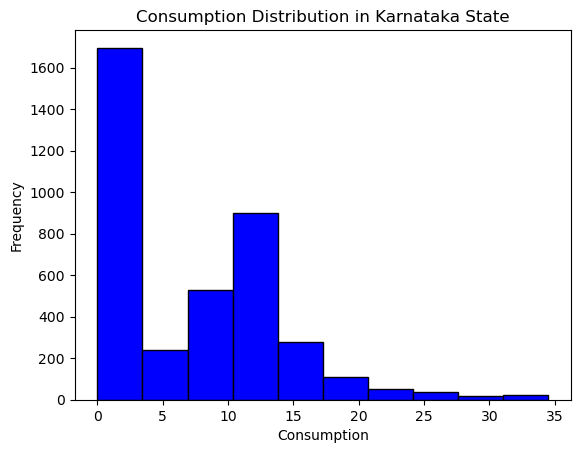

In [21]:
plt.hist(kanew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Karnataka State')
plt.show()

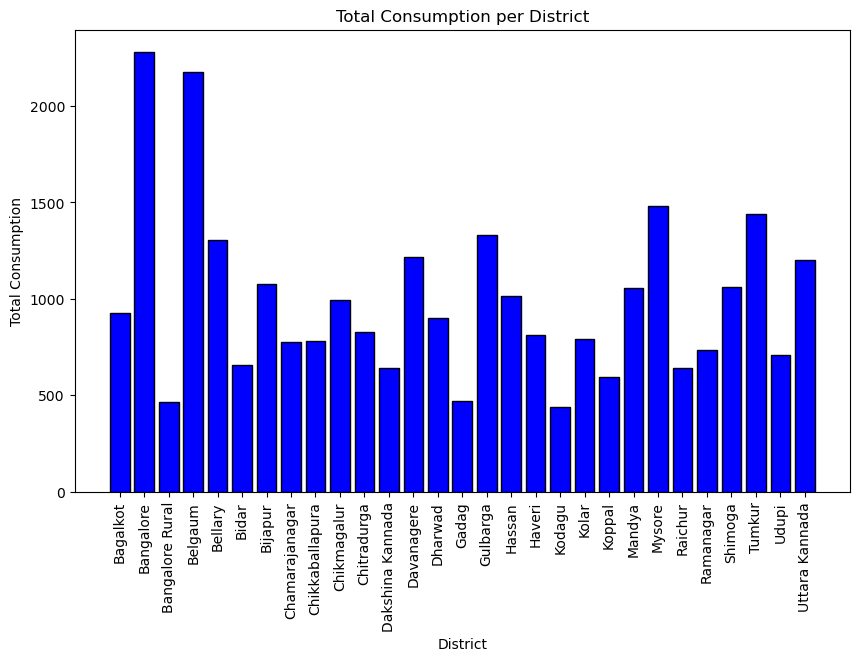

In [22]:
KA_consumption = kanew.groupby('District')['total_consumption'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(KA_consumption['District'], KA_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.xticks(rotation=90)
plt.show()

In [23]:
data_map = gpd.read_file("/Users/preethireddy/Desktop/KARNATAKA_DISTRICTS.geojson")

In [24]:
data_map = data_map.rename(columns={'dtname': 'District'})
data_map_data = data_map.merge(KA_consumption, on='District')

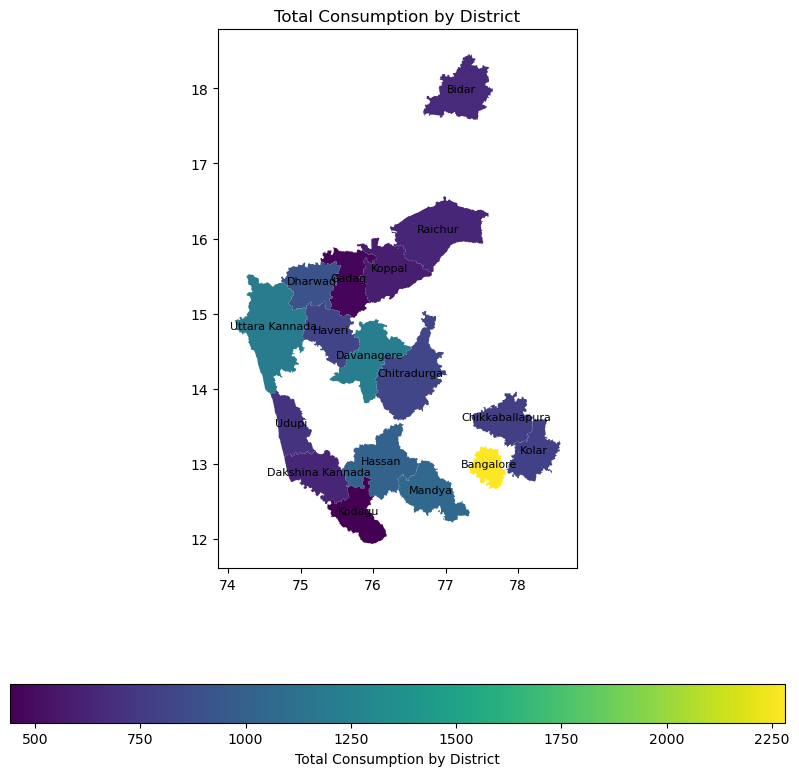

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True, legend_kwds={'label': "Total Consumption by District",
                        'orientation': "horizontal"})
data_map_data.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title("Total Consumption by District")
plt.show()